<a href="https://colab.research.google.com/github/HenriqueColombari/Processamento_Imagens/blob/main/Tarefa05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exercicio 1


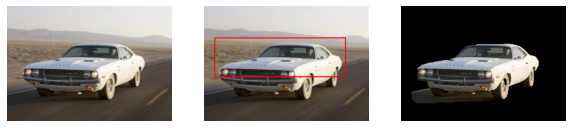

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img1 = cv.imread('car_audio.png')
img1 = cv.cvtColor(img1,cv.COLOR_BGR2RGB)

#Retângulo de Segmentação

img2 = img1.copy()
p1 = (30,90)
p2 = (400,200)
img2 = cv.rectangle(img2, p1, p2, (255,0,0), 2)

#Parâmetros

mascara = np.zeros(img1.shape[:2], np.uint8)  #receber o resultado do algoritmo
bgModel = np.zeros((1,65), np.float64)        #modelo do background
fgModel = np.zeros((1,65), np.float64)        #modelo do foreground
retangulo = p1 + p2

#aplicar o algoritmo GRABCUT

# cv.GC_INIT_WITH_RECT = retângulo de segmentação
# cv.GC_INIT_WITH_MASK = pixels de segmentação informados pelo usuário

cv.grabCut(img1, mascara, retangulo, bgModel, fgModel, 5, cv.GC_INIT_WITH_RECT)

#Separar o background do foreground
#Após a segmentação, a variável mascara contém valores entre 0 e 3
#Os valores iguais a 0 ou 2 representam o Background 
#Os valores iguais a 1 ou 3 representam o Foreground 

#Filtrar os pixels de background

filtro = np.where((mascara == 0) | (mascara == 2), 0, 1).astype('uint8')
img3 = img1.copy()
img3 = img3*filtro[:,:,np.newaxis]

plt.figure(figsize=(10,10))
plt.subplot(131), plt.imshow(img1), plt.axis("off")
plt.subplot(132), plt.imshow(img2), plt.axis("off")
plt.subplot(133), plt.imshow(img3), plt.axis("off")
plt.show()

#Exercicio 2

In [ ]:
!wget "https://homepages.cae.wisc.edu/~ece533/images/lena.png"

--2021-05-11 11:07:10--  https://homepages.cae.wisc.edu/~ece533/images/lena.png
Resolving homepages.cae.wisc.edu (homepages.cae.wisc.edu)... 144.92.13.84, 2607:f388:1082:0:279f:7b00:a091:17d7
Connecting to homepages.cae.wisc.edu (homepages.cae.wisc.edu)|144.92.13.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 512673 (501K) [image/png]
Saving to: ‘lena.png’

lena.png            100%[===================>] 500.66K  1.52MB/s    in 0.3s    

2021-05-11 11:07:11 (1.52 MB/s) - ‘lena.png’ saved [512673/512673]



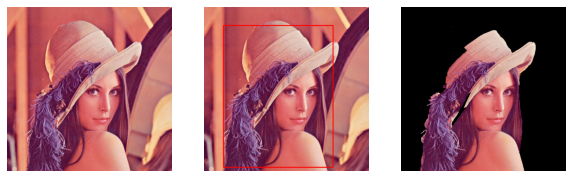

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img1 = cv.imread('lena.png')
img1 = cv.cvtColor(img1,cv.COLOR_BGR2RGB)

#Retângulo de Segmentação

img2 = img1.copy()
p1 = (60,60)
p2 = (400,500)
img2 = cv.rectangle(img2, p1, p2, (255,0,0), 2)

#Parâmetros

mascara = np.zeros(img1.shape[:2], np.uint8)  #receber o resultado do algoritmo
bgModel = np.zeros((1,65), np.float64)        #modelo do background
fgModel = np.zeros((1,65), np.float64)        #modelo do foreground
retangulo = p1 + p2

#aplicar o algoritmo GRABCUT

# cv.GC_INIT_WITH_RECT = retângulo de segmentação
# cv.GC_INIT_WITH_MASK = pixels de segmentação informados pelo usuário

cv.grabCut(img1, mascara, retangulo, bgModel, fgModel, 5, cv.GC_INIT_WITH_RECT)

#Separar o background do foreground
#Após a segmentação, a variável mascara contém valores entre 0 e 3
#Os valores iguais a 0 ou 2 representam o Background 
#Os valores iguais a 1 ou 3 representam o Foreground 

#Filtrar os pixels de background

filtro = np.where((mascara == 0) | (mascara == 2), 0, 1).astype('uint8')
img3 = img1.copy()
img3 = img3*filtro[:,:,np.newaxis]

plt.figure(figsize=(10,10))
plt.subplot(131), plt.imshow(img1), plt.axis("off")
plt.subplot(132), plt.imshow(img2), plt.axis("off")
plt.subplot(133), plt.imshow(img3), plt.axis("off")
plt.show()